In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from load_data import load_data
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf


# 创建模型序列
model = Sequential()
model.add(Conv2D(96,(7,7),strides=(2,2),input_shape=(320,320,3),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(2,2),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))

 





Using TensorFlow backend.


In [2]:
# 载入数据
path = './Standard/RGB320'
X,y = load_data(path,128,layers=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

[('Pikachu', 454), ('Squirtle', 410), ('Bulbasaur', 387), ('Mewtwo', 355), ('Charmander', 354), ('Psyduck', 264), ('Raichu', 174), ('Spearow', 168), ('Muk', 161), ('Aerodactyl', 152), ('Dratini', 151), ('Fearow', 143), ('Shellder', 126), ('Rapidash', 107), ('Mankey', 103), ('Ninetales', 101), ('Sandslash', 99), ('Lapras', 98), ('Pidgey', 97), ('Machamp', 88)]
Class1:Pikachu
Class2:Squirtle
Class3:Bulbasaur
Class4:Mewtwo
Class5:Charmander
Class6:Psyduck
Class7:Raichu
Class8:Spearow
Class9:Muk
Class10:Aerodactyl
Class11:Dratini
Class12:Fearow
Class13:Shellder
Class14:Rapidash
Class15:Mankey
Class16:Ninetales
Class17:Sandslash
Class18:Lapras
Class19:Pidgey
Class20:Machamp
(3992, 320, 320, 3)


In [3]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])  
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 157, 157, 96)      14208     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 78, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 19, 19, 256)      

In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 45, # Degree range for random rotations
    zoom_range = 0.2, # Range for random zoom 
    horizontal_flip = True, # Randomly flip inputs horizontally
    width_shift_range = 0.15, # Range for horizontal shift 
    height_shift_range = 0.15, # Range for vertical shift 
    shear_range = 0.2) # Shear Intensity
datagen.fit(X_train)


#history = model.fit(X_train, y_train, batch_size=16, epochs=100,validation_data = [X_test, y_test],callbacks = [checkpoint])



checkpoint = ModelCheckpoint('ZFNet.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)
#history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=2,callbacks=[checkpoint])

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 16), epochs = 100, validation_data = [X_test, y_test],callbacks = [checkpoint])


Epoch 1/100
200/200 [==============================] - 60s 302ms/step - loss: 2.6995 - accuracy: 0.1851 - val_loss: 2.4652 - val_accuracy: 0.2904

Epoch 00001: val_accuracy improved from -inf to 0.29036, saving model to ZFNet.hdf5
Epoch 2/100
200/200 [==============================] - 58s 290ms/step - loss: 2.4909 - accuracy: 0.2499 - val_loss: 2.3399 - val_accuracy: 0.3479

Epoch 00002: val_accuracy improved from 0.29036 to 0.34793, saving model to ZFNet.hdf5
Epoch 3/100
200/200 [==============================] - 56s 282ms/step - loss: 2.3030 - accuracy: 0.3082 - val_loss: 1.9363 - val_accuracy: 0.4243

Epoch 00003: val_accuracy improved from 0.34793 to 0.42428, saving model to ZFNet.hdf5
Epoch 4/100
200/200 [==============================] - 58s 292ms/step - loss: 2.1483 - accuracy: 0.3649 - val_loss: 1.7965 - val_accuracy: 0.4606

Epoch 00004: val_accuracy improved from 0.42428 to 0.46058, saving model to ZFNet.hdf5
Epoch 5/100
200/200 [==============================] - 57s 286ms/st

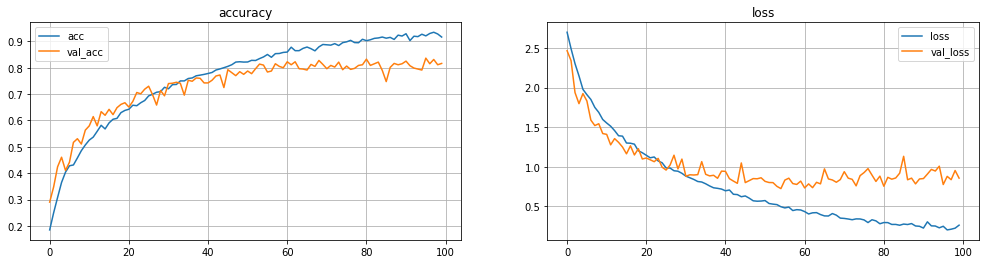

In [5]:
import matplotlib.pyplot as plt
# Plot learning curves

fig = plt.figure(figsize = (17, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')
plt.savefig("./Image/ZFNet_sgd_epoch100_beach_size20_320_gendata.png")

In [6]:
# 保存模型
model.save("./Model/ZFNet_sgd_epoch100_beach_size20_320_gendata")

In [1]:
#320 no gendata
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from load_data import load_data
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf


# 创建模型序列
model = Sequential()
model.add(Conv2D(96,(7,7),strides=(2,2),input_shape=(320,320,3),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(2,2),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))


Using TensorFlow backend.


In [2]:
# 载入数据
path = './Standard/RGB320'
X,y = load_data(path,128,layers=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

[('Pikachu', 454), ('Squirtle', 410), ('Bulbasaur', 387), ('Mewtwo', 355), ('Charmander', 354), ('Psyduck', 264), ('Raichu', 174), ('Spearow', 168), ('Muk', 161), ('Aerodactyl', 152), ('Dratini', 151), ('Fearow', 143), ('Shellder', 126), ('Rapidash', 107), ('Mankey', 103), ('Ninetales', 101), ('Sandslash', 99), ('Lapras', 98), ('Pidgey', 97), ('Machamp', 88)]
Class1:Pikachu
Class2:Squirtle
Class3:Bulbasaur
Class4:Mewtwo
Class5:Charmander
Class6:Psyduck
Class7:Raichu
Class8:Spearow
Class9:Muk
Class10:Aerodactyl
Class11:Dratini
Class12:Fearow
Class13:Shellder
Class14:Rapidash
Class15:Mankey
Class16:Ninetales
Class17:Sandslash
Class18:Lapras
Class19:Pidgey
Class20:Machamp
(3992, 320, 320, 3)


In [3]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 157, 157, 96)      14208     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 78, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 19, 19, 256)      

In [4]:
#history = model.fit(X_train, y_train, batch_size=16, epochs=100,validation_data = [X_test, y_test],callbacks = [checkpoint])



checkpoint = ModelCheckpoint('ZFNet.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=2,callbacks=[checkpoint])

#history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 16), epochs = 100, validation_data = [X_test, y_test],callbacks = [checkpoint])


Train on 3193 samples, validate on 799 samples
Epoch 1/100
 - 17s - loss: 2.7028 - accuracy: 0.1892 - val_loss: 2.4085 - val_accuracy: 0.2628

Epoch 00001: val_accuracy improved from -inf to 0.26283, saving model to ZFNet.hdf5
Epoch 2/100
 - 13s - loss: 2.3818 - accuracy: 0.3025 - val_loss: 2.2419 - val_accuracy: 0.3292

Epoch 00002: val_accuracy improved from 0.26283 to 0.32916, saving model to ZFNet.hdf5
Epoch 3/100
 - 12s - loss: 2.1139 - accuracy: 0.3699 - val_loss: 1.8754 - val_accuracy: 0.4468

Epoch 00003: val_accuracy improved from 0.32916 to 0.44681, saving model to ZFNet.hdf5
Epoch 4/100
 - 11s - loss: 1.9515 - accuracy: 0.4134 - val_loss: 1.8187 - val_accuracy: 0.4493

Epoch 00004: val_accuracy improved from 0.44681 to 0.44931, saving model to ZFNet.hdf5
Epoch 5/100
 - 12s - loss: 1.7310 - accuracy: 0.4616 - val_loss: 2.0028 - val_accuracy: 0.3705

Epoch 00005: val_accuracy did not improve from 0.44931
Epoch 6/100
 - 11s - loss: 1.6284 - accuracy: 0.5139 - val_loss: 1.6143 -

Text(0.5, 1.0, 'loss')

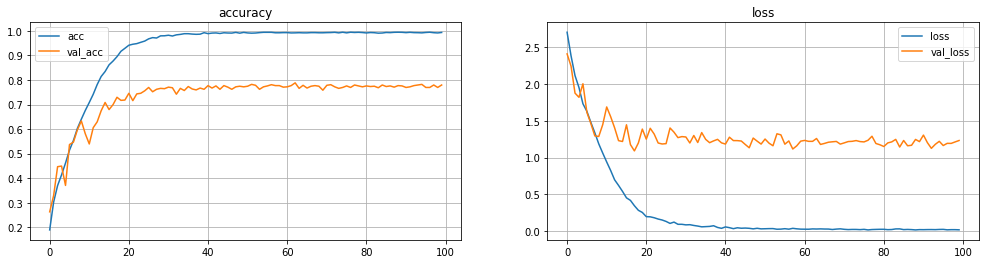

In [5]:
import matplotlib.pyplot as plt
# Plot learning curves

fig = plt.figure(figsize = (17, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')


In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from load_data import load_data
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf


# 创建模型序列
model = Sequential()
model.add(Conv2D(96,(7,7),strides=(2,2),input_shape=(224,224,3),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(2,2),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))

Using TensorFlow backend.


In [2]:
# 载入数据
path = './Standard/RGB224'
X,y = load_data(path,128,layers=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

[('Pikachu', 454), ('Squirtle', 410), ('Bulbasaur', 387), ('Mewtwo', 355), ('Charmander', 354), ('Psyduck', 264), ('Raichu', 174), ('Spearow', 168), ('Muk', 161), ('Aerodactyl', 152), ('Dratini', 151), ('Fearow', 143), ('Shellder', 126), ('Rapidash', 107), ('Mankey', 103), ('Ninetales', 101), ('Sandslash', 99), ('Lapras', 98), ('Pidgey', 97), ('Machamp', 88)]
Class1:Pikachu
Class2:Squirtle
Class3:Bulbasaur
Class4:Mewtwo
Class5:Charmander
Class6:Psyduck
Class7:Raichu
Class8:Spearow
Class9:Muk
Class10:Aerodactyl
Class11:Dratini
Class12:Fearow
Class13:Shellder
Class14:Rapidash
Class15:Mankey
Class16:Ninetales
Class17:Sandslash
Class18:Lapras
Class19:Pidgey
Class20:Machamp
(3992, 224, 224, 3)


In [3]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])  
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 109, 109, 96)      14208     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 256)      

In [4]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 45, # Degree range for random rotations
    zoom_range = 0.2, # Range for random zoom 
    horizontal_flip = True, # Randomly flip inputs horizontally
    width_shift_range = 0.15, # Range for horizontal shift 
    height_shift_range = 0.15, # Range for vertical shift 
    shear_range = 0.2) # Shear Intensity
datagen.fit(X_train)


#history = model.fit(X_train, y_train, batch_size=16, epochs=100,validation_data = [X_test, y_test],callbacks = [checkpoint])



checkpoint = ModelCheckpoint('ZFNet.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)
#history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=2,callbacks=[checkpoint])

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 16), epochs = 100, validation_data = [X_test, y_test],callbacks = [checkpoint])


Epoch 1/100
200/200 [==============================] - 35s 177ms/step - loss: 2.7192 - accuracy: 0.1710 - val_loss: 2.5414 - val_accuracy: 0.2103

Epoch 00001: val_accuracy improved from -inf to 0.21026, saving model to ZFNet.hdf5
Epoch 2/100
200/200 [==============================] - 32s 162ms/step - loss: 2.4681 - accuracy: 0.2524 - val_loss: 2.2960 - val_accuracy: 0.3805

Epoch 00002: val_accuracy improved from 0.21026 to 0.38048, saving model to ZFNet.hdf5
Epoch 3/100
200/200 [==============================] - 32s 162ms/step - loss: 2.3279 - accuracy: 0.3104 - val_loss: 2.1986 - val_accuracy: 0.3254

Epoch 00003: val_accuracy did not improve from 0.38048
Epoch 4/100
200/200 [==============================] - 33s 163ms/step - loss: 2.1400 - accuracy: 0.3614 - val_loss: 2.0978 - val_accuracy: 0.3367

Epoch 00004: val_accuracy did not improve from 0.38048
Epoch 5/100
200/200 [==============================] - 33s 166ms/step - loss: 1.9885 - accuracy: 0.3946 - val_loss: 1.8709 - val_ac

Text(0.5, 1.0, 'loss')

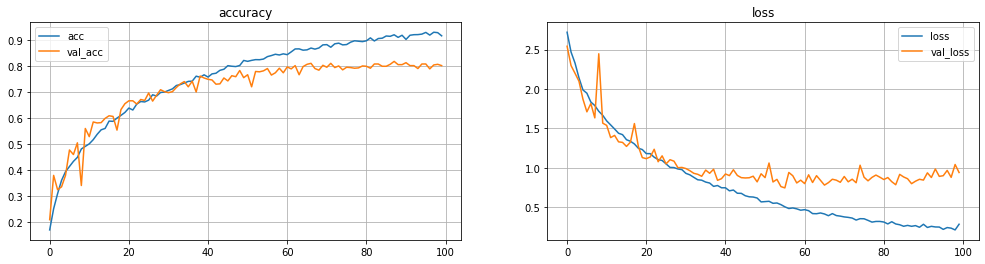

In [5]:
import matplotlib.pyplot as plt
# Plot learning curves

fig = plt.figure(figsize = (17, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from load_data import load_data
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf


# 创建模型序列
model = Sequential()
model.add(Conv2D(96,(7,7),strides=(2,2),input_shape=(224,224,3),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(2,2),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))

Using TensorFlow backend.


In [2]:
# 载入数据
path = './Standard/RGB224'
X,y = load_data(path,128,layers=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

[('Pikachu', 454), ('Squirtle', 410), ('Bulbasaur', 387), ('Mewtwo', 355), ('Charmander', 354), ('Psyduck', 264), ('Raichu', 174), ('Spearow', 168), ('Muk', 161), ('Aerodactyl', 152), ('Dratini', 151), ('Fearow', 143), ('Shellder', 126), ('Rapidash', 107), ('Mankey', 103), ('Ninetales', 101), ('Sandslash', 99), ('Lapras', 98), ('Pidgey', 97), ('Machamp', 88)]
Class1:Pikachu
Class2:Squirtle
Class3:Bulbasaur
Class4:Mewtwo
Class5:Charmander
Class6:Psyduck
Class7:Raichu
Class8:Spearow
Class9:Muk
Class10:Aerodactyl
Class11:Dratini
Class12:Fearow
Class13:Shellder
Class14:Rapidash
Class15:Mankey
Class16:Ninetales
Class17:Sandslash
Class18:Lapras
Class19:Pidgey
Class20:Machamp
(3992, 224, 224, 3)


In [3]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])  
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 109, 109, 96)      14208     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 256)      

In [4]:



#history = model.fit(X_train, y_train, batch_size=16, epochs=100,validation_data = [X_test, y_test],callbacks = [checkpoint])



checkpoint = ModelCheckpoint('ZFNet.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=2,callbacks=[checkpoint])

#history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 16), epochs = 100, validation_data = [X_test, y_test],callbacks = [checkpoint])


Train on 3193 samples, validate on 799 samples
Epoch 1/100
 - 11s - loss: 2.7130 - accuracy: 0.1650 - val_loss: 2.4398 - val_accuracy: 0.2428

Epoch 00001: val_accuracy improved from -inf to 0.24280, saving model to ZFNet.hdf5
Epoch 2/100
 - 7s - loss: 2.4151 - accuracy: 0.2850 - val_loss: 2.2214 - val_accuracy: 0.3467

Epoch 00002: val_accuracy improved from 0.24280 to 0.34668, saving model to ZFNet.hdf5
Epoch 3/100
 - 7s - loss: 2.1806 - accuracy: 0.3592 - val_loss: 1.9246 - val_accuracy: 0.4305

Epoch 00003: val_accuracy improved from 0.34668 to 0.43054, saving model to ZFNet.hdf5
Epoch 4/100
 - 6s - loss: 1.9983 - accuracy: 0.4059 - val_loss: 1.9888 - val_accuracy: 0.3917

Epoch 00004: val_accuracy did not improve from 0.43054
Epoch 5/100
 - 7s - loss: 1.7981 - accuracy: 0.4491 - val_loss: 1.6361 - val_accuracy: 0.5069

Epoch 00005: val_accuracy improved from 0.43054 to 0.50688, saving model to ZFNet.hdf5
Epoch 6/100
 - 7s - loss: 1.7230 - accuracy: 0.4695 - val_loss: 1.5504 - val_

Text(0.5, 1.0, 'loss')

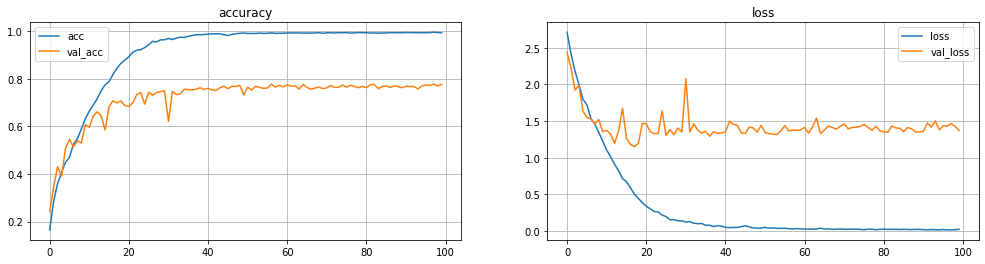

In [5]:
import matplotlib.pyplot as plt
# Plot learning curves

fig = plt.figure(figsize = (17, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from load_data import load_data
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf


# 创建模型序列
model = Sequential()
model.add(Conv2D(96,(7,7),strides=(2,2),input_shape=(128,128,3),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(2,2),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))

In [3]:
# 载入数据
path = './Standard/RGB128'
X,y = load_data(path,128,layers=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

[('Pikachu', 454), ('Squirtle', 410), ('Bulbasaur', 387), ('Mewtwo', 355), ('Charmander', 354), ('Psyduck', 264), ('Raichu', 174), ('Spearow', 168), ('Muk', 161), ('Aerodactyl', 152), ('Dratini', 151), ('Fearow', 143), ('Shellder', 126), ('Rapidash', 107), ('Mankey', 103), ('Ninetales', 101), ('Sandslash', 99), ('Lapras', 98), ('Pidgey', 97), ('Machamp', 88)]
Class1:Pikachu
Class2:Squirtle
Class3:Bulbasaur
Class4:Mewtwo
Class5:Charmander
Class6:Psyduck
Class7:Raichu
Class8:Spearow
Class9:Muk
Class10:Aerodactyl
Class11:Dratini
Class12:Fearow
Class13:Shellder
Class14:Rapidash
Class15:Mankey
Class16:Ninetales
Class17:Sandslash
Class18:Lapras
Class19:Pidgey
Class20:Machamp
(3992, 128, 128, 3)


In [4]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])  
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 61, 61, 96)        14208     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 384)         885120    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 384)         1327488   
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 256)        

In [5]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 45, # Degree range for random rotations
    zoom_range = 0.2, # Range for random zoom 
    horizontal_flip = True, # Randomly flip inputs horizontally
    width_shift_range = 0.15, # Range for horizontal shift 
    height_shift_range = 0.15, # Range for vertical shift 
    shear_range = 0.2) # Shear Intensity
datagen.fit(X_train)


#history = model.fit(X_train, y_train, batch_size=16, epochs=100,validation_data = [X_test, y_test],callbacks = [checkpoint])



checkpoint = ModelCheckpoint('ZFNet.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)
#history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=2,callbacks=[checkpoint])

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 16), epochs = 100, validation_data = [X_test, y_test],callbacks = [checkpoint])


Epoch 1/100
200/200 [==============================] - 16s 78ms/step - loss: 2.7299 - accuracy: 0.1513 - val_loss: 2.5938 - val_accuracy: 0.2053

Epoch 00001: val_accuracy improved from -inf to 0.20526, saving model to ZFNet.hdf5
Epoch 2/100
200/200 [==============================] - 13s 65ms/step - loss: 2.4422 - accuracy: 0.2609 - val_loss: 2.4092 - val_accuracy: 0.2816

Epoch 00002: val_accuracy improved from 0.20526 to 0.28160, saving model to ZFNet.hdf5
Epoch 3/100
200/200 [==============================] - 13s 66ms/step - loss: 2.2938 - accuracy: 0.3060 - val_loss: 2.1574 - val_accuracy: 0.3254

Epoch 00003: val_accuracy improved from 0.28160 to 0.32541, saving model to ZFNet.hdf5
Epoch 4/100
200/200 [==============================] - 13s 64ms/step - loss: 2.1608 - accuracy: 0.3589 - val_loss: 1.9027 - val_accuracy: 0.4406

Epoch 00004: val_accuracy improved from 0.32541 to 0.44055, saving model to ZFNet.hdf5
Epoch 5/100
200/200 [==============================] - 13s 65ms/step - 

Text(0.5, 1.0, 'loss')

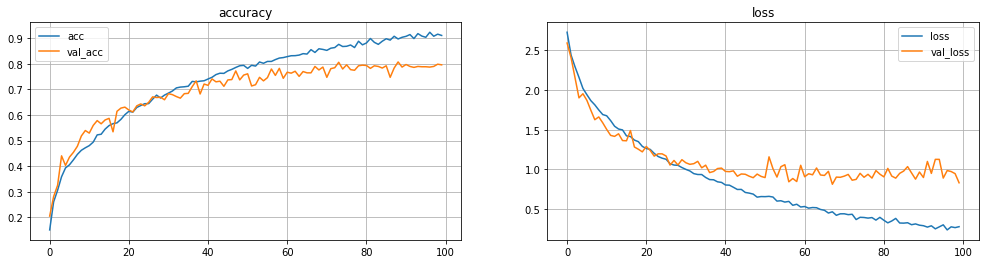

In [6]:
import matplotlib.pyplot as plt
# Plot learning curves

fig = plt.figure(figsize = (17, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from load_data import load_data
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf


# 创建模型序列
model = Sequential()
model.add(Conv2D(96,(7,7),strides=(2,2),input_shape=(128,128,3),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(2,2),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='softmax'))

Using TensorFlow backend.


In [2]:
# 载入数据
path = './Standard/RGB128'
X,y = load_data(path,128,layers=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

[('Pikachu', 454), ('Squirtle', 410), ('Bulbasaur', 387), ('Mewtwo', 355), ('Charmander', 354), ('Psyduck', 264), ('Raichu', 174), ('Spearow', 168), ('Muk', 161), ('Aerodactyl', 152), ('Dratini', 151), ('Fearow', 143), ('Shellder', 126), ('Rapidash', 107), ('Mankey', 103), ('Ninetales', 101), ('Sandslash', 99), ('Lapras', 98), ('Pidgey', 97), ('Machamp', 88)]
Class1:Pikachu
Class2:Squirtle
Class3:Bulbasaur
Class4:Mewtwo
Class5:Charmander
Class6:Psyduck
Class7:Raichu
Class8:Spearow
Class9:Muk
Class10:Aerodactyl
Class11:Dratini
Class12:Fearow
Class13:Shellder
Class14:Rapidash
Class15:Mankey
Class16:Ninetales
Class17:Sandslash
Class18:Lapras
Class19:Pidgey
Class20:Machamp
(3992, 128, 128, 3)


In [3]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])  
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 61, 61, 96)        14208     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 384)         885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 384)         1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)        

In [4]:
#history = model.fit(X_train, y_train, batch_size=16, epochs=100,validation_data = [X_test, y_test],callbacks = [checkpoint])



checkpoint = ModelCheckpoint('ZFNet.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=2,callbacks=[checkpoint])

#history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 16), epochs = 100, validation_data = [X_test, y_test],callbacks = [checkpoint])


Train on 3193 samples, validate on 799 samples
Epoch 1/100
 - 6s - loss: 2.6944 - accuracy: 0.1820 - val_loss: 2.4777 - val_accuracy: 0.2753

Epoch 00001: val_accuracy improved from -inf to 0.27534, saving model to ZFNet.hdf5
Epoch 2/100
 - 3s - loss: 2.3962 - accuracy: 0.2853 - val_loss: 2.2573 - val_accuracy: 0.2941

Epoch 00002: val_accuracy improved from 0.27534 to 0.29412, saving model to ZFNet.hdf5
Epoch 3/100
 - 3s - loss: 2.2197 - accuracy: 0.3423 - val_loss: 2.0481 - val_accuracy: 0.3680

Epoch 00003: val_accuracy improved from 0.29412 to 0.36796, saving model to ZFNet.hdf5
Epoch 4/100
 - 3s - loss: 2.0503 - accuracy: 0.3874 - val_loss: 2.0523 - val_accuracy: 0.4093

Epoch 00004: val_accuracy improved from 0.36796 to 0.40926, saving model to ZFNet.hdf5
Epoch 5/100
 - 3s - loss: 1.8871 - accuracy: 0.4331 - val_loss: 1.7528 - val_accuracy: 0.4506

Epoch 00005: val_accuracy improved from 0.40926 to 0.45056, saving model to ZFNet.hdf5
Epoch 6/100
 - 3s - loss: 1.7892 - accuracy: 0

Text(0.5, 1.0, 'loss')

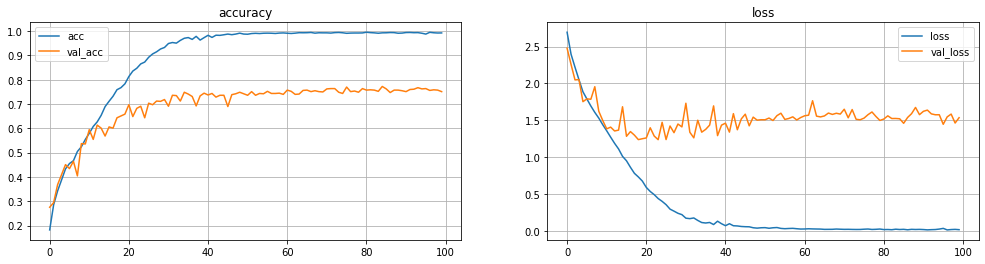

In [6]:
import matplotlib.pyplot as plt
# Plot learning curves

fig = plt.figure(figsize = (17, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')